In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
class Hive:
    """
    To model the fluctuating population of a bee hive throughtout time. Our function f
    should be a function that recieves a day of the year and outputs the population 
    numbers for drones and worker bees of the hive at that time of year. We always assume 
    the hive has 1 queen bee.
    """
    
    def __init__(self,f,day=None):
        self.f = f
        self.day = day % 365
        self.queen = 1
        self.drones = 0
        self.workers = 0
    
    def drone(self,num=None):
        if num != None:
            self.drones += num
        else:
            self.drones += 1
        
    def worker(self,num=None):
        if num != None:
            self.workers += num
        else:
            self.workers += 1
            
    def populate(self, day = None):
        if day != None:
            self.day = day
        if self.day == None:
            raise KeyError("No day provided")
        self.drones, self.workers = self.f(self.day)

In [3]:
def f(day):
    """
    An altered sine function with highest population occuring
    at the start of July, and lowest population occuring at 
    the end of December. We assume a population loss of 50% 
    in the winter.
    """
    pop = lambda day: .25*np.sin(2*np.pi/365*(day+275)) +.75
    num_bees = 30000*pop(day)
    workers = int(num_bees*.98)
    drones = int(num_bees - workers)
    return drones,workers

In [4]:
def dayOfYear(date):
    days = [0,31,28,31,30,31,30,31,31,30,31,30,31]
    d = list(map(int,date.split("-")))
    for i in range(1,len(days)):
         days[i]+=days[i-1]
    return days[d[0]-1]+d[1]-1

asdsdasd

## Pesticide stuff

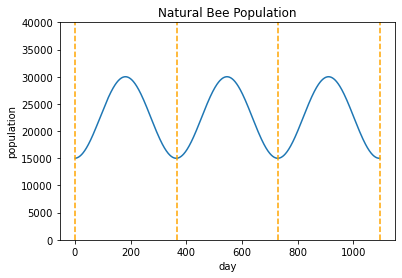

In [5]:
num_years = 3
day_domain = np.arange(1, 365*num_years+1)
pop_list = []
for day in day_domain:
    drones, workers = f(day)
    population = drones + workers
    pop_list.append(population)

plt.plot(day_domain, pop_list)
for i in range(num_years+1):
    plt.axvline(x=365*(i), linestyle='--', color='orange')
plt.ylim(0, 40000)
plt.xlabel('day')
plt.ylabel('population')
plt.title('Natural Bee Population')
plt.show()


# Mites

In [65]:
γ = 2 #infection rate
ω = .3 #recovery rate
t = np.linspace(0,12,366)
death_rate  = 1
y = [.90,.1,0]

In [66]:
def ODE(y,t,γ,ω):
    sus, inf, rec = y
    dydt = [-inf*γ*sus, inf*γ*sus - ω*inf, ω*inf]
    return dydt

In [67]:
sol = odeint(ODE,y,t,args = (γ,ω))

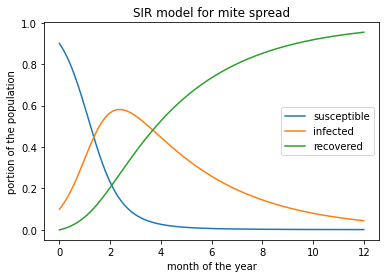

In [70]:
plt.plot(t,sol[:,0],label = 'susceptible')
plt.plot(t,sol[:,1],label = 'infected')
plt.plot(t,sol[:,2],label = 'recovered')
plt.title('SIR model for mite spread')
plt.ylabel('portion of the population')
plt.xlabel('month of the year')
plt.legend()
plt.savefig('SIR_mite_spread.png')

In [53]:
def pop_model(recovered,bees):
    u = np.zeros_like(recovered)
    u[0] = 0
    for i in range(1,len(recovered)):
        u[i-1]= - (recovered[i]-recovered[i-1])*bees*200
    u[-1] = u[-2]
#     print(u)
    return u

(366,)


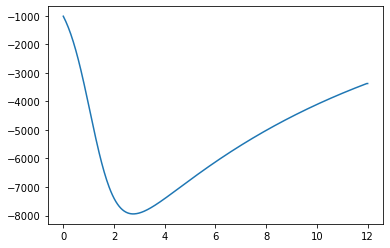

In [54]:
recoverd = odeint(ODE,y,t,args = (γ,ω))[:,2]
infected = odeint(ODE,y,t,args = (γ,ω))[:,1]
print(recoverd.shape)
mite_ = pop_model(recoverd,15000)
plt.plot(t,mite_)

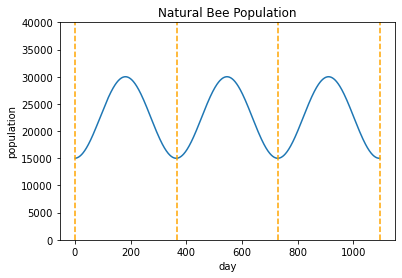

In [45]:
num_years = 3
day_domain = np.arange(1, 365*num_years+1)
pop_list = []
for day in day_domain:
    drones, workers = f(day)
    population = drones + workers
    pop_list.append(population)

plt.plot(day_domain, pop_list)
for i in range(num_years+1):
    plt.axvline(x=365*(i), linestyle='--', color='orange')
plt.ylim(0, 40000)
plt.xlabel('day')
plt.ylabel('population')
plt.title('Natural Bee Population')
plt.show()

In [46]:
def p(p0,day):
    """
    An altered sine function with highest population occuring
    at the start of July, and lowest population occuring at 
    the end of December. We assume a population loss of 50% 
    in the winter.
    """
    change = lambda day: 30000*(.25*np.sin(2*np.pi/365*(day+275)) - .25*np.sin(2*np.pi/365*(day+274)))
    p1 = p0 + change(day)
    return p1

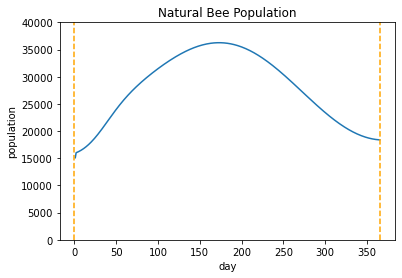

In [47]:
num_years = 1
day_domain = np.arange(1, 365*num_years+1)
pop_list = [15000]
for day in day_domain:
    population = p(pop_list[-1],day)
    pop_list.append(population)

plt.plot(day_domain, (pop_list-mite_)[:-1])
for i in range(num_years+1):
    plt.axvline(x=365*(i), linestyle='--', color='orange')
plt.ylim(0, 40000)
plt.xlabel('day')
plt.ylabel('population')
plt.title('Natural Bee Population')
plt.show()

# create model for 3 year

11626.908666092402
9012.333675310305
6985.705367412103


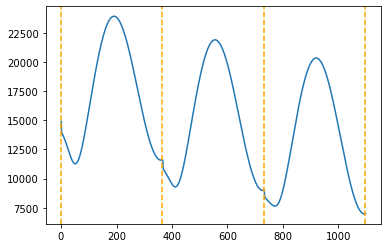

In [48]:
#first year
recoverd = odeint(ODE,y,t,args = (γ,ω))[:,2]
initial_pop = 15000
yr1_mites = pop_model(recoverd,initial_pop)
yr1_natural = [initial_pop]
day_domain = np.arange(1, 365*num_years+1)
for day in day_domain:
    population = p(yr1_natural[-1],day)
    yr1_natural.append(population)
yr1 = yr1_natural+yr1_mites


#second year
initial_pop = yr1[-1]
recoverd = odeint(ODE,y,t,args = (γ,ω))[:,2]
yr2_mites = pop_model(recoverd,initial_pop)
yr2_natural = [initial_pop]
day_domain = np.arange(1, 365*num_years+1)
for day in day_domain:
    population = p(yr2_natural[-1],day)
    yr2_natural.append(population)
yr2 = yr2_natural+yr2_mites


#third year
initial_pop = yr2[-1]
recoverd = odeint(ODE,y,t,args = (γ,ω))[:,2]
yr3_mites = pop_model(recoverd,initial_pop)
yr3_natural = [initial_pop]
day_domain = np.arange(1, 365*num_years+1)
for day in day_domain:
    population = p(yr3_natural[-1],day)
    yr3_natural.append(population)
yr3 = yr3_natural+yr3_mites



combi = np.hstack((yr1,yr2,yr3))
plt.plot(np.arange(1,1099),combi)
for i in range(4):
    plt.axvline(x=365*(i), linestyle='--', color='orange')

print(yr1[-1])
print(yr2[-1])
print(yr3[-1])

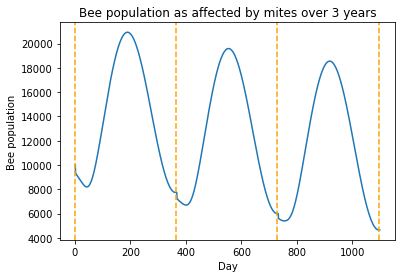

In [64]:
recoverd = odeint(ODE,y,t,args = (γ,ω))[:,2]
initial = 10000
combi = [initial]
for i in range(3):
    mites = pop_model(recoverd,combi[-1])
    natural = [combi[-1]]
    day_domain = np.arange(1, 365*num_years+1)
    for day in day_domain:
        population = p(natural[-1],day)
        natural.append(population)
    yr = mites+natural
    combi = np.hstack((combi,yr))
plt.plot(np.arange(1,1100),combi)
for i in range(4):
    plt.axvline(x=365*(i), linestyle='--', color='orange')
plt.title('Bee population as affected by mites over 3 years')
plt.ylabel('Bee population')
plt.xlabel('Day')
plt.savefig('3yr_pop_mites_V1.png')
    
